# 1. BUSINESS UNDERSTANDING

Tujuan dari pemodelan ini adalah untuk memprediksi apakah pelanggan kartu kredit beresiko terlambat bayar pada bulan Mei berdasarkan data pada bulan Februari-April 2015 pada data testing.

# 2. DATA UNDERSTANDING

Data berisi informasi terkait pelanggan kartu kredit di suatu negara pada periode Januari-Maret 2015. Informasi meliputi latar belakang pelanggan, jumlah tagihan, jumlah pembayaran, lama terlambat bayar dan status pembayaran bulan berikutnya (April 2015).

## 2.1 IMPORT LIBRARY

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## 2.2 LOAD DATA

### TRAINING

In [4]:
train=pd.read_csv('training.csv')
data=train
train.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,2,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,3,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,4,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


### DATA INFO

In [4]:
train.shape

(16625, 16)

Data terdiri dari 16.625 transaksi dan 16 feature.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16625 entries, 0 to 16624
Data columns (total 16 columns):
ID           16625 non-null int64
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
PAY_1        16625 non-null int64
PAY_2        16625 non-null int64
PAY_3        16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
PAY_AMT1     16625 non-null float64
PAY_AMT2     16625 non-null float64
PAY_AMT3     16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.0 MB


### MENENTUKAN NUMERIK AND KATEGORIK

In [21]:
numerik = train[['AGE', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']]
kategorik = train[['MARRIAGE', 'EDUCATION', 'SEX', 'PAY_1', 'PAY_2', 'PAY_3']]

# 3. DATA EXPLORATION

Mengeksplor sekaligus mempersiapkan data untuk selanjutnya masuk ke tahap modeling.

## 3.1 MISSING VALUES

In [5]:
#count how many 
count_missing = train.isnull().sum().sort_values(ascending = False)
count_missing.head(10)

TARGET       0
PAY_AMT3     0
PAY_AMT2     0
PAY_AMT1     0
BILL_AMT3    0
BILL_AMT2    0
BILL_AMT1    0
PAY_3        0
PAY_2        0
PAY_1        0
dtype: int64

Tidak ada nilai null dalam dataset.

## 3.2 DROP UNECESSARY COLUMN

In [6]:
train=train.drop(columns='ID')
train.head()

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0,0
1,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0,0
2,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0,0
3,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0,0
4,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0,0


## 3.3 CEK OUTLIER

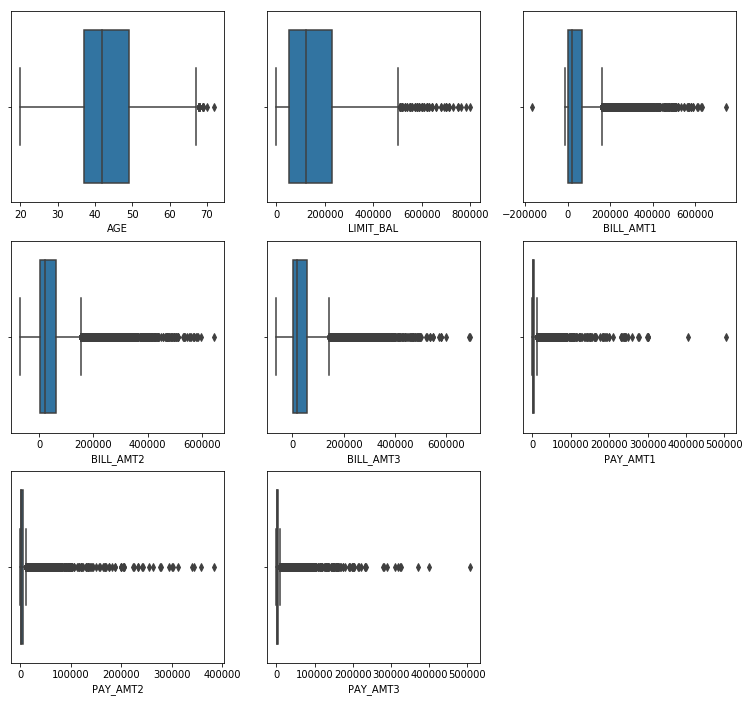

In [10]:
# boxplot numerik
f=plt.figure(figsize=(13,12))

x = 0
for num in numerik :
    x=x+1
    f.add_subplot(3,3,x)
    sns.boxplot(train[num],orient = "h")

##### TRANSFORM WITH MIN MAX SCALLER

In [24]:
# TRANSFORM WITH MIN MAX SCALLER
norm=train[['AGE', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'MARRIAGE', 'EDUCATION', 'SEX', 'PAY_1', 'PAY_2', 'PAY_3']]
min_max_scaler = preprocessing.MinMaxScaler()

x = 0
for n in norm :
    x=x+1
    np_x = min_max_scaler.fit_transform(norm[[n]])
    norm[n] = pd.DataFrame(np_x)
    
# np_LIMIT_BAL = min_max_scaler.fit_transform(norm[['LIMIT_BAL']])
# np_BILL_AMT1 = min_max_scaler.fit_transform(norm[['BILL_AMT1']])
# np_BILL_AMT2 = min_max_scaler.fit_transform(norm[['BILL_AMT2']])
# np_BILL_AMT3 = min_max_scaler.fit_transform(norm[['BILL_AMT3']])
# np_PAY_AMT1 = min_max_scaler.fit_transform(norm[['PAY_AMT1']])
# np_PAY_AMT2 = min_max_scaler.fit_transform(norm[['PAY_AMT2']])
# np_PAY_AMT3 = min_max_scaler.fit_transform(norm[['PAY_AMT3']])
# norm['LIMIT_BAL'] = pd.DataFrame(np_LIMIT_BAL)
# norm['BILL_AMT1'] = pd.DataFrame(np_BILL_AMT1)
# norm['BILL_AMT2'] = pd.DataFrame(np_BILL_AMT2)
# norm['BILL_AMT3'] = pd.DataFrame(np_LIMIT_BAL)
# norm['PAY_AMT1'] = pd.DataFrame(np_PAY_AMT1)
# norm['PAY_AMT2'] = pd.DataFrame(np_PAY_AMT2)
# norm['PAY_AMT3'] = pd.DataFrame(np_PAY_AMT3)

print("------Sebelum transformasi :\n", train.head())
print("\n")
print("------Sesudah transformasi :\n", norm.head())


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


------Sebelum transformasi :
    LIMIT_BAL  MARRIAGE  EDUCATION  SEX  AGE  PAY_1  PAY_2  PAY_3  BILL_AMT1  \
0    30000.0         1          1    2   40      0      0      0    24607.0   
1    20000.0         1          1    2   41      1      2      0    17040.0   
2    20000.0         1          1    2   36      0      0      0    17332.0   
3    20000.0         1          1    2   35      0      0      0     2003.0   
4   170000.0         1          1    2   38      0      0      0   171465.0   

   BILL_AMT2  BILL_AMT3  PAY_AMT1  PAY_AMT2  PAY_AMT3  TARGET  
0    24430.0    23881.0    1700.0    1600.0    1287.0       0  
1    16474.0    17203.0       0.0    1300.0    1500.0       0  
2    18600.0    17947.0    1580.0    1367.0    1178.0       0  
3     2948.0     3372.0    1086.0    1000.0       0.0       0  
4   145196.0   110163.0   18500.0   13998.0    3760.0       0  


------Sesudah transformasi :
         AGE  LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  PAY_AMT1  PAY_AMT2  \


Min max scaller digunakan untuk normalisasi nilai dari 0 sampai 1.

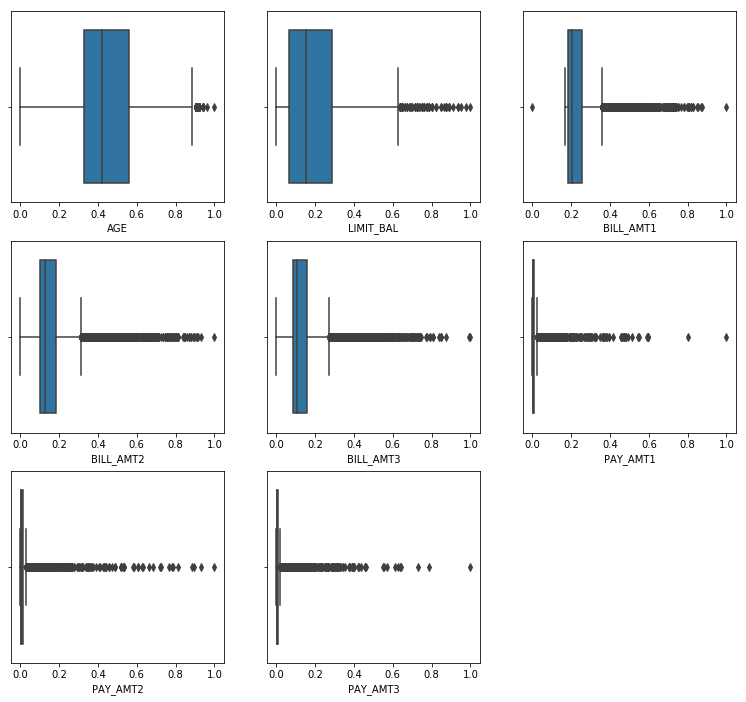

In [25]:
# BOXPLOT AFTER TRANSFORM
f=plt.figure(figsize=(13,12))

x = 0
for num in numerik :
    x=x+1
    f.add_subplot(3,3,x)
    sns.boxplot(norm[num],orient = "h")

Setelah dilakukan tranformasi, ternyata data outlier tetap ada. Maka dari itu nilai outlier ini tidak akan dilakukan normalisasi atau dihilangkan dari data set, karena variabel-variabel di atas memiliki potensi sebagai feature importance.<br>
Selanjutnya akan digunakan beberapa model algoritma untuk mencari nilai AUC yang paling optimal.

## 3.4 HEATMAP UNTUK MENGETAHUI FEATURE YANG PALING MEMENGARUHI TARGET

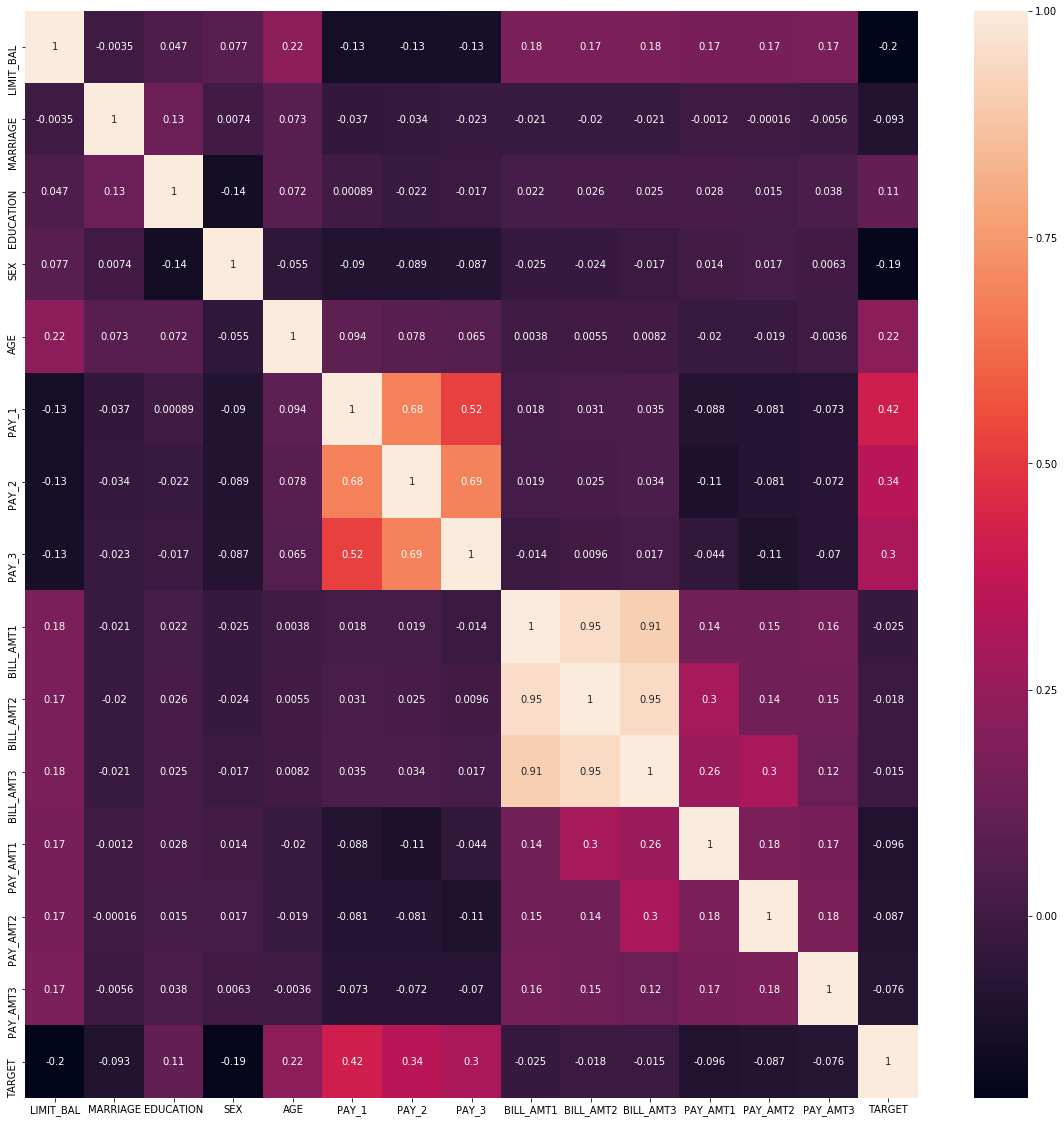

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(data.iloc[:,1:16].corr(), annot=True)

Dari heatmap di atas dapat dilihat bahwa terdapat feature yang memiliki nilai positif yaitu :
1. PAY_1
2. PAY_2
3. PAY_3
4. AGE
5. EDUCATION <br>

Feature-feature tersebut **memiliki potensi** untuk dijadikan **feature importance** yang selanjutnya akan dimasukkan ke dalam model.

## 3.5 VISUALISASI FEATURE
Tujuan dari visualisasi ini untuk memastikan feature importance mana saja yang nantinya akan dipakai untuk membangun model.

PAY 1, PAY 2, PAY 3

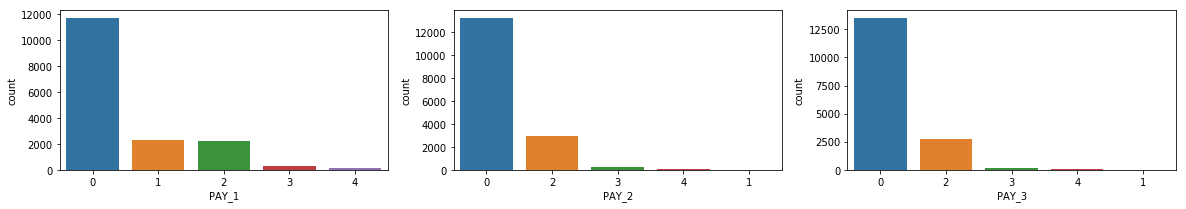

In [26]:
f=plt.figure(figsize=(20,10))
f.add_subplot(3,3,1)
sns.countplot(train['PAY_1'], order = train['PAY_1'].value_counts().index)
f.add_subplot(3,3,2)
sns.countplot(train['PAY_2'], order = train['PAY_2'].value_counts().index)
f.add_subplot(3,3,3)
sns.countplot(train['PAY_3'], order = train['PAY_3'].value_counts().index)

Grafik di atas menunjukkan berapa banyak orang yang melakukan pembayaran tepat waktu dari pembayaran pertama, kedua, dan ketiga.<br>
Terlihat bahwa mayoritas customer membayar tepat waktu (bar warna biru) di setiap pembayarannya.
<br>
<br>
Selain itu, grafik PAY_1, PAY_2, PAY_3 memiliki pola naik turun yang sama. Oleh karena itu, akan dipilih salah satu dari ketiga feature di atas. Feature tersebut adalah **PAY_1**, dikarenakan nilai keterkaitan pada heatmap correlation menunjukkan nilai yang lebih tinggi dibandingkan PAY_2 dan PAY_3.

AGE

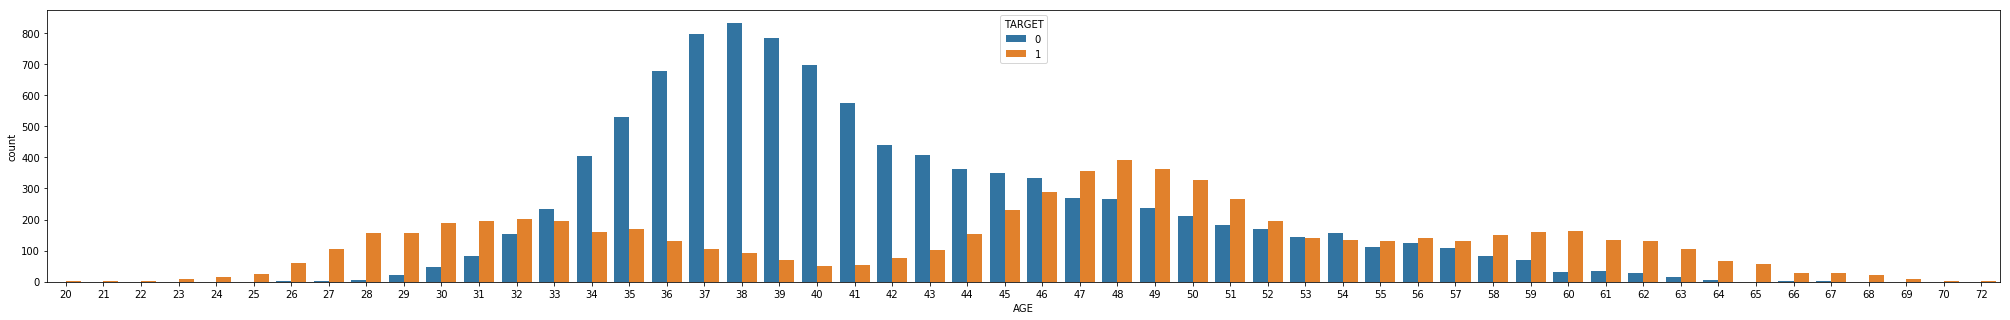

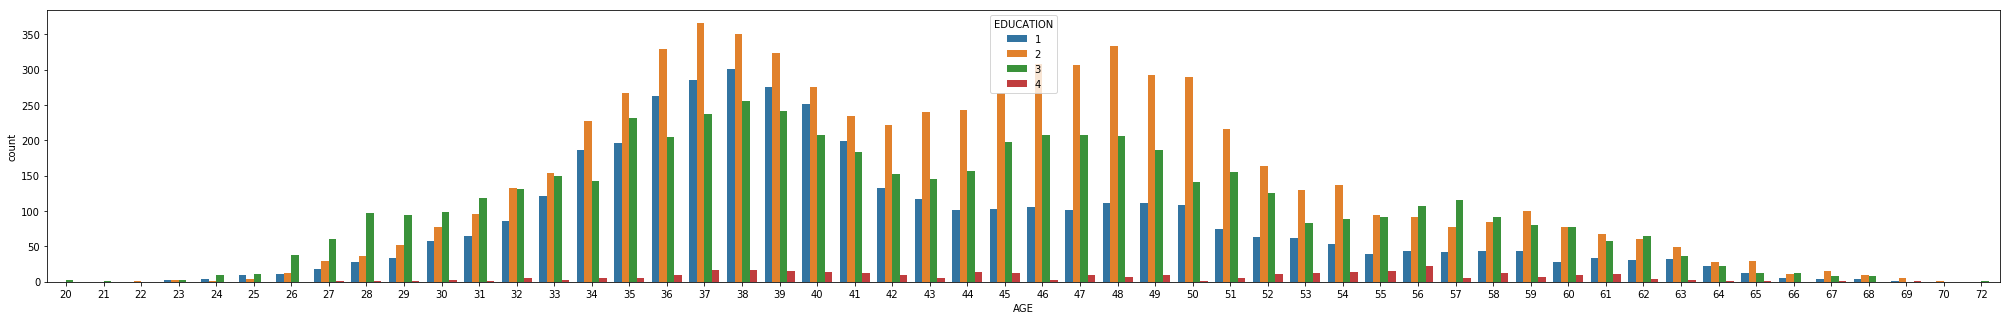

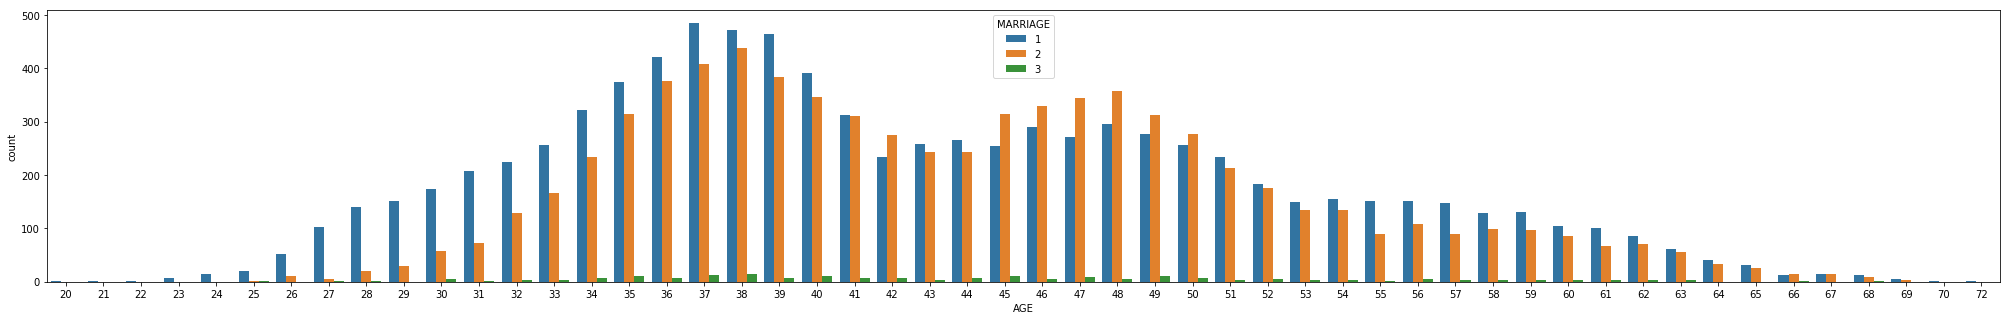

In [37]:
# AGE - TARGET
plt.figure(figsize=(35,5))
sns.countplot(train['AGE'], hue=train['TARGET'])
# plt.show()

# AGE - EDUCATION
plt.figure(figsize=(35,5))
sns.countplot(train['AGE'], hue=train['EDUCATION'])
plt.show()

# AGE - MARRIAGE
plt.figure(figsize=(35,5))
sns.countplot(train['AGE'], hue=train['MARRIAGE'])
plt.show()

Dari data di atas, dapat dilihat bahwa customer dengan range umur 33 - 46 lebih tepat waktu dalam membayar, dengan status perkawinannya belum menikah dan pendidikan terakhirnya adalah S1.
<br>
<br>
Pada grafik pun dapat dilihat bahwa pola antara grafik age-education dan age-marriage memiliki pola yang sama. Oleh karena itu, akan dipilih salah satu dari kedua feature tersebut. Feature yang akan dijadikan **feature importance** adalah **EDUCATION**, dikarenakan nilai keterkaitan pada heatmap correlation menunjukkan nilai yang lebih tinggi dibandingkan MARRIAGE.

EDUCATION

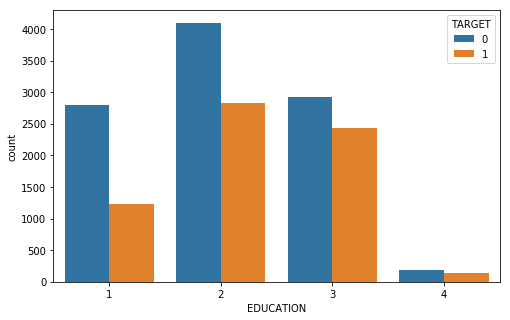

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(train['EDUCATION'], hue=train['TARGET'])
plt.show()
# Target 0 : tepat waktu, 1 : terlambat bayar

Dari grafik di atas, terlihat bahwa *apa pun pendidikan terakhirnya*, orang yang membayar tepat waktu lebih banyak dibandingkan dengan orang yang terlambat bayar.

MARRIAGE

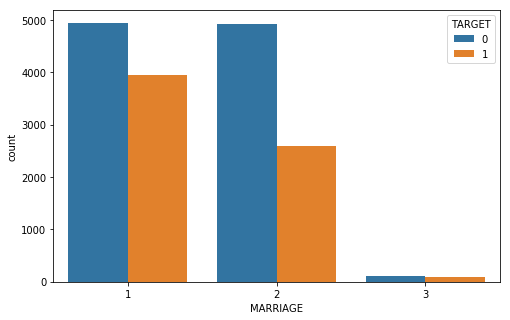

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(train['MARRIAGE'], hue=train['TARGET'])
plt.show()
# Target 0 : tepat waktu, 1 : terlambat bayar

Dari grafik di atas, terlihat bahwa *apa pun status perkawinannya*, orang yang membayar tepat waktu lebih banyak dibandingkan dengan orang yang terlambat bayar.

SEX

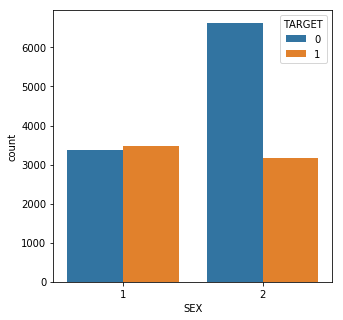

In [41]:
plt.figure(figsize=(5,5))
sns.countplot(data['SEX'], hue=train['TARGET'])
plt.show()
# sex 1 : laki, 2 : perempuan

Dari data diatas, terlihat bahwa laki-laki lebih banyak yang telat membayar sedangkan perempuan lebih banyak yang tepat waktu membayar. Dengan kata lain, perbedaan gender dapat memengaruhi waktu pembayarannya tepat atau terlambat. Variabel **SEX** akan dijadikan sebagai **feature importance**.

LIMIT_BAL (Batas Maksimal Kredit)

In [242]:
# meanLB = data[['LIMIT_BAL', 'TARGET']].groupby('TARGET').mean()
# meanLB

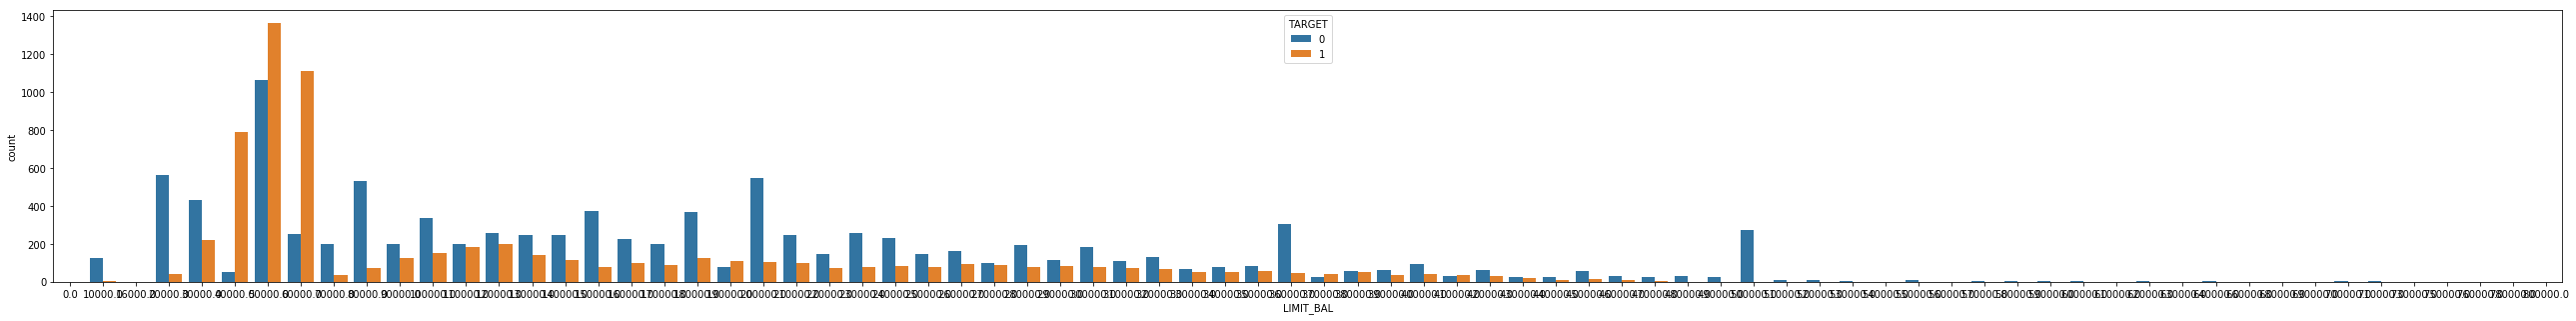

In [243]:
# plt.figure(figsize=(5,3))

# x=range(2)
# plt.bar(x,meanLB['LIMIT_BAL'])
# plt.xticks(x,meanLB.index)
# plt.xlabel('TARGET')
# plt.ylabel('Mean LIMIT_BAL')
# plt.title('TARGET VS LIMIT_BAL')
# plt.show()

plt.figure(figsize=(45,5))
sns.countplot(data['LIMIT_BAL'], hue=train['TARGET'])
plt.show()

Dari grafik di atas, terlihat bahwa *semakin tinggi LIMIT_BAL, maka orang akan cenderung tidak terlambat dalam membayar kredit*. Oleh karena itu, **LIMIT_BAL** akan digunakan sebagai **feature importance**.

## MODELLING

##### IMPORT FEATURE IMPORTANCE

In [374]:
X=data[['LIMIT_BAL', 'PAY_1', 'AGE', 'EDUCATION', 'SEX']]  # Features
y=data['TARGET'] #Target

##### SPLIT DATA TRAIN DAN DATA TEST

In [375]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### 1. RANDOM FOREST

##### IMPORT LIBRARY

In [376]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics

##### COMPILE ALGORITHM

In [377]:
clf=RandomForestClassifier(random_state=20) #pick random sample

In [378]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=20, verbose=0, warm_start=False)

##### GET THE RESULT

In [379]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

##### CONFUSION MATRIX

In [380]:
# untuk ngitung true positive, false positive
conf=confusion_matrix(y_test, y_pred)
conf
print('True positive\t: ', conf[0,0])
print('False positive\t: ', conf[0,1])
print('True negative\t: ', conf[1,0])
print('False negative\t: ', conf[1,1])

True positive	:  2556
False positive	:  419
True negative	:  429
False negative	:  1584


##### ACCURACY

In [381]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))
print("Precission: %.2f" % metrics.precision_score(y_test, y_pred)) #precision : true positive
print("Recall: %.2f" % metrics.recall_score(y_test, y_pred)) #recall : false positive
print("AUC: %.2f" % metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.83
Precission: 0.79
Recall: 0.79
AUC: 0.82


##### PLOT ROC

In [382]:
# plot AUC
def rocCurve(aClf, X_test, y_test, modelName):
    roc_auc = roc_auc_score(y_test, aClf.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, aClf.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, color='orange', label='Luas area under curve = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

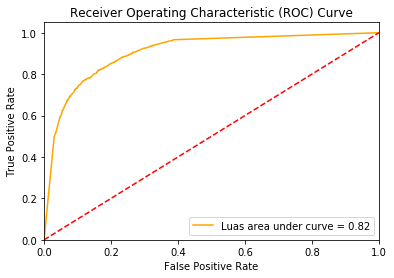

In [383]:
rocCurve(clf, X_test, y_test, modelName = 'Random Forest')

Dari grafik di atas, dapat dilihat bahwa garis ROC berada diatas garis AUC, dimana nilai **AUC sebesar 0,82**. Semakin siku-siku garis ROC maka nilai AUC yang didapatkan akan semakin mendekati 1 (bagus).

##### SVM

In [224]:
# from sklearn import svm

In [384]:
# clf = svm.SVC(C=1, kernel='linear') #kernel bisa diganti: linear, radial.
# clf.fit(X, y)

In [385]:
# y_pred = clf.predict(X_test)
# y_pred

In [386]:
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))
# print("Precission: %.2f" % metrics.precision_score(y_test, y_pred)) #precision : true positive
# print("Recall: %.2f" % metrics.recall_score(y_test, y_pred)) #recall : false positive
# print("AUC: %.2f" % metrics.roc_auc_score(y_test, y_pred))

In [387]:
# # plot AUC
# def rocCurve1(aClf, X_test, y_test, modelName):
#     roc_auc = roc_auc_score(y_test, aClf.predict(X_test))
#     fpr, tpr, thresholds = roc_curve(y_test, aClf.predict_proba(X_test)[:,1])
#     plt.figure()
#     plt.plot(fpr, tpr, color='orange', label='Luas area under curve = %0.2f' % roc_auc)
#     plt.plot([0, 1], [0, 1], 'r--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC) Curve')
#     plt.legend(loc='lower right')
#     plt.show()

In [388]:
# rocCurve1(clf, X_test, y_test, modelName = 'Random Forest')

### 2. LOGISTIC REGRESSION

In [389]:
from sklearn.linear_model import LogisticRegression

In [390]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [391]:
y_pred=logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [392]:
# untuk ngitung true positive, false positive
conf1=confusion_matrix(y_test, y_pred)
conf1
print('True positive\t: ', conf1[0,0])
print('False positive\t: ', conf1[0,1])
print('True negative\t: ', conf1[1,0])
print('False negative\t: ', conf1[1,1])

True positive	:  2584
False positive	:  391
True negative	:  1717
False negative	:  296


In [393]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))
print("Precission: %.2f" % metrics.precision_score(y_test, y_pred)) #precision : true positive
print("Recall: %.2f" % metrics.recall_score(y_test, y_pred)) #recall : false positive
print("AUC: %.2f" % metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.58
Precission: 0.43
Recall: 0.15
AUC: 0.51


Dari data di atas, dapat dilihat bahwa AUC memiliki nilai **sebesar 0,51**.

##### DECISION TREE

In [394]:
from sklearn.tree import DecisionTreeClassifier

In [395]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(X_train,y_train)

In [396]:
y_pred = clf.predict(X_test)

In [397]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))
print("Precission: %.2f" % metrics.precision_score(y_test, y_pred)) #precision : true positive
print("Recall: %.2f" % metrics.recall_score(y_test, y_pred)) #recall : false positive
print("AUC: %.2f" % metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.81
Precission: 0.87
Recall: 0.62
AUC: 0.78


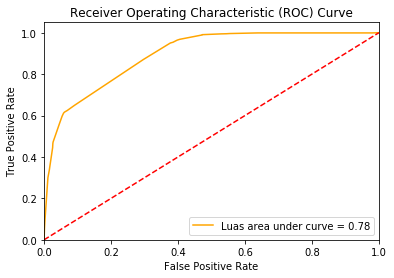

In [398]:
rocCurve(clf, X_test, y_test, modelName = 'DECISION TREE')

Dari grafik di atas, dapat dilihat bahwa garis ROC berada diatas garis AUC, dimana nilai **AUC sebesar 0,78**.

#### MODEL YANG DIPILIH

Dari model yang digunakan, dapat dilihat bahwa **RANDOM FOREST** memiliki nilai AUC yang paling tinggi : 0,82.

## HASIL TESTING

##### LOAD DATA TESTING

In [399]:
test=pd.read_csv('testing.csv', delimiter=';')
test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0


In [400]:
clf = RandomForestClassifier(random_state=20)
clf = clf.fit(X_train,y_train)

Xtest=test[['LIMIT_BAL', 'PAY_1', 'AGE', 'EDUCATION', 'SEX']]  # Features

y_pred=clf.predict(Xtest)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [401]:
test['TARGET']=pd.Series(y_pred)
test.head()

,ID,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,TARGET
0,1,30000.0,1,1,2,40,0,0,0,24430.0,23881.0,24234.0,1600.0,1287.0,1296.0,0
1,2,20000.0,1,1,2,41,2,0,0,16474.0,17203.0,18411.0,1300.0,1500.0,824.0,0
2,3,20000.0,1,1,2,36,0,0,0,18600.0,17947.0,18758.0,1367.0,1178.0,712.0,0
3,4,20000.0,1,1,2,35,0,0,0,2948.0,3372.0,0.0,1000.0,0.0,0.0,0
4,5,170000.0,1,1,2,38,0,0,0,145196.0,110163.0,112157.0,13998.0,3760.0,4000.0,0


In [402]:
test.shape

(16625, 16)

In [403]:
test.to_csv('Hasil testing credit scoring - baru.csv')